In [99]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# data

In [100]:
data = np.genfromtxt('data/perceptron_toydata.txt', delimiter = '\t')
data[:2]

array([[ 0.77, -1.14,  0.  ],
       [-0.33,  1.44,  0.  ]])

In [101]:
X, y = data[:,:2], data[:,2]
y = y.astype(np.int)

X[:2], y[:2]

(array([[ 0.77, -1.14],
        [-0.33,  1.44]]),
 array([0, 0]))

In [102]:
print("class label counts", np.bincount(y))
print(X.shape, y.shape)

class label counts [50 50]
(100, 2) (100,)


In [103]:
# Shuffling 
shuffle_idx = np.arange(y.shape[0])
print(shuffle_idx[:3])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
print(shuffle_idx[:3])

[0 1 2]
[ 8 70 82]


In [104]:
# train/test split
X, y = X[shuffle_idx], y[shuffle_idx]
X[:2], y[:2]

(array([[ 0.39, -1.99],
        [ 0.51,  2.44]]),
 array([0, 1]))

In [105]:
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

X_train[:2], y_train[:2]

(array([[ 2.95,  2.09],
        [-3.33, -0.44]]),
 array([1, 0]))

In [106]:
# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(0), X_train.std(0)
print(mu, sigma)

X_train = (X_train - mu) / sigma
X_test  =(X_test - mu) / sigma
print(X_train.mean(0), X_train.std(0))
print(X_test.mean(0), X_test.std(0))

[-0.07671429  0.20257143] [2.20925632 2.11120256]
[2.06184276e-17 7.93016446e-18] [1. 1.]
[0.34614104 0.17514279] [0.96309299 1.17336907]


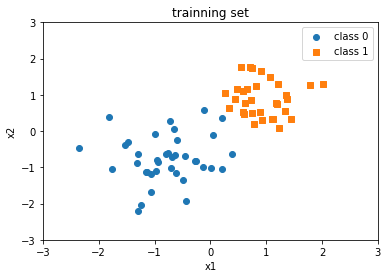

In [107]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label = 'class 0', marker = 'o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label = 'class 1', marker = 's')
plt.title("trainning set")
plt.xlabel("x1")
plt.ylabel('x2')
plt.xlim([-3,3])
plt.ylim([-3,3])

plt.legend()
plt.show()

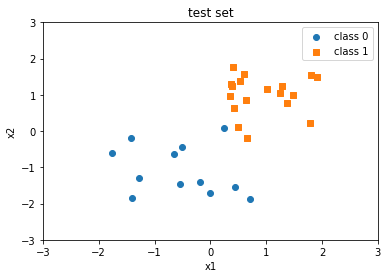

In [108]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label = 'class 0', marker = 'o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label = 'class 1', marker = 's')
plt.title("test set")
plt.xlabel("x1")
plt.ylabel('x2')
plt.xlim([-3,3])
plt.ylim([-3,3])

plt.legend()
plt.show()

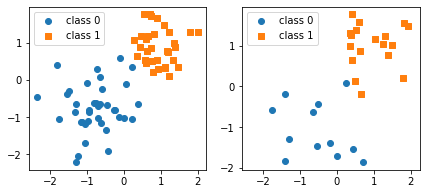

In [109]:
fig, ax = plt.subplots(1,2, sharex =True, figsize=(7,3))

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label = 'class 0', marker = 'o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label = 'class 1', marker = 's')
ax[0].legend()

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label = 'class 0', marker = 'o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label = 'class 1', marker = 's')
ax[1].legend()

plt.show()

# Model: numpy

In [110]:
p = 2
W = np.zeros((p,1), dtype=np.float)
b = np.zeros(1, dtype=np.float)

z = X_train @ W + b
y_bar =np.where(z > 0., 1, 0).reshape(-1)
error = y_train - y_bar



W, b, z[:1], z.shape

(array([[0.],
        [0.]]),
 array([0.]),
 array([[0.]]),
 (70, 1))

In [111]:
error.shape

(70,)

In [112]:
y_train.shape, y_bar.shape

((70,), (70,))

In [113]:
X_train[1].reshape(1,2)

array([[-1.47257051, -0.30436276]])

In [114]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias # comp. net input
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [115]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]



In [116]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 93.33%


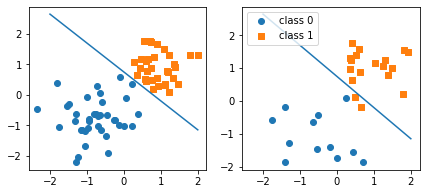

In [117]:
### 2D Decision Boundary

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

# Model: Pytorch

In [118]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        
        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [119]:

ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[1.2734],
        [1.3464]])
  Bias: tensor([-1.])


In [120]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


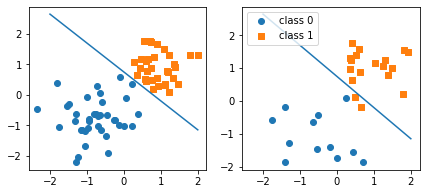

In [121]:
w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()